## Descriptive Analytics

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

### Import Data

In [2]:
charging_sessions_data = pd.read_csv("cleaned_data.csv")
weather_data = pd.read_csv("weather_burbank_airport.csv")

charging_sessions_data.head(5)

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,WhPerMile,kWhRequested,milesRequested,minutesAvailable,requestedDeparture
0,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",400.0,8.00,20.0,65.0,2020-01-02 15:04:58
1,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13-08:00,2020-01-02 15:00:41-08:00,2020-01-02 12:13:21-08:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,3519.0,"[{'WhPerMile': 600, 'kWhRequested': 24.0, 'mil...",600.0,24.00,40.0,624.0,2020-01-03 00:24:13
2,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,933.0,"[{'WhPerMile': 385, 'kWhRequested': 65.45, 'mi...",385.0,65.45,170.0,647.0,2020-01-03 00:56:14
3,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,3737.0,"[{'WhPerMile': 300, 'kWhRequested': 45.0, 'mil...",300.0,45.00,150.0,126.0,2020-01-02 16:23:32
4,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38-08:00,2020-01-02 11:36:05-08:00,2020-01-02 10:38:39-08:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil...",400.0,40.00,100.0,491.0,2020-01-02 22:36:38


In [3]:
# Due to the export to csv file the right format cannot be kept
# Therefore, the columns with datetime type need to be reformatted
charging_sessions_data["connectionTime"] = pd.to_datetime(charging_sessions_data["connectionTime"], utc=True)
charging_sessions_data["disconnectTime"] = pd.to_datetime(charging_sessions_data["disconnectTime"], utc=True)
charging_sessions_data["doneChargingTime"] = pd.to_datetime(charging_sessions_data["doneChargingTime"], utc=True)

charging_sessions_data['connectionTime'] = charging_sessions_data['connectionTime'].dt.tz_convert('America/Los_Angeles')
charging_sessions_data['disconnectTime'] = charging_sessions_data['disconnectTime'].dt.tz_convert('America/Los_Angeles')
charging_sessions_data['doneChargingTime'] = charging_sessions_data['doneChargingTime'].dt.tz_convert('America/Los_Angeles')

charging_sessions_data.dtypes

id                                                 object
connectionTime        datetime64[ns, America/Los_Angeles]
disconnectTime        datetime64[ns, America/Los_Angeles]
doneChargingTime      datetime64[ns, America/Los_Angeles]
kWhDelivered                                      float64
sessionID                                          object
siteID                                              int64
spaceID                                            object
stationID                                          object
timezone                                           object
userID                                             object
userInputs                                         object
WhPerMile                                         float64
kWhRequested                                      float64
milesRequested                                    float64
minutesAvailable                                  float64
requestedDeparture                                 object
dtype: object

In [4]:
charging_sessions_data.head(5)

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,WhPerMile,kWhRequested,milesRequested,minutesAvailable,requestedDeparture
0,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",400.0,8.00,20.0,65.0,2020-01-02 15:04:58
1,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13-08:00,2020-01-02 15:00:41-08:00,2020-01-02 12:13:21-08:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,3519.0,"[{'WhPerMile': 600, 'kWhRequested': 24.0, 'mil...",600.0,24.00,40.0,624.0,2020-01-03 00:24:13
2,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,933.0,"[{'WhPerMile': 385, 'kWhRequested': 65.45, 'mi...",385.0,65.45,170.0,647.0,2020-01-03 00:56:14
3,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,3737.0,"[{'WhPerMile': 300, 'kWhRequested': 45.0, 'mil...",300.0,45.00,150.0,126.0,2020-01-02 16:23:32
4,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38-08:00,2020-01-02 11:36:05-08:00,2020-01-02 10:38:39-08:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil...",400.0,40.00,100.0,491.0,2020-01-02 22:36:38


### Operational Performance and Statistics on Charging Hubs
1. **Temporal Patterns and Seasonality**
* Demonstrate in a figure how the number of charging events varies during 
    1. the day
    2. the week 
    3. between seasons **(Karoline)**
* Note down observed patterns and possible explanation for them
2. **Key Performance Indicators (KPIs)**
* Define three time-dependent KPIs (to include in a dashboard for the hub operator):
    1. Peak and Off-Utilization Time (per Site) **(Marietta)**
    2. Idle Time per Hour per SiteID (disconnect - chargingdone) **(Angela)**
    3. Average Energy Delivered per Session per SiteID per Hour **(CoCo)**
* Requirements for KPIs:
    * Must provide an immediate overview of the current hub operation
    * Show how the hub operation is doing in terms of *utilization or other business-related aspects*
* Provide explanation for each KPI selection in relation to the requirements and if necessary provide references
* Calculate *hourly values* for the KPIs and visualize them over time
* Note down observed trends and possible explainations for them
3. **Site Characteristics** ***(Simon)***
* Find out which of the two sites is supplying the private and public charging hub data
* Combine data from the tasks before to determine the difference in the operation of private and public charging hub data
* Note down explanation and reasoning behind the decision

### 1. Temporal Patterns and Seasonality

#### 1.1. Number of Charging Events during the Day

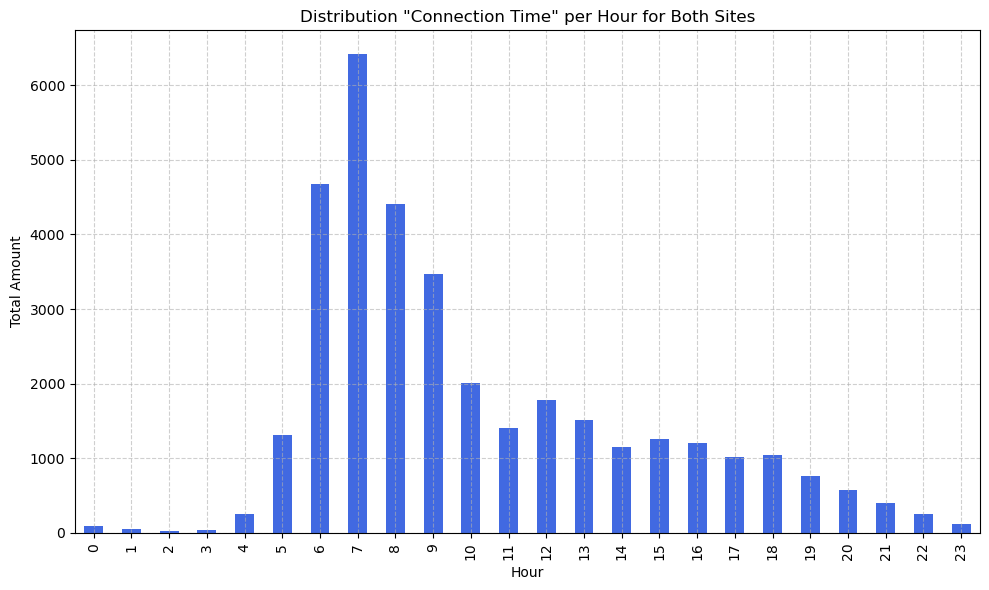

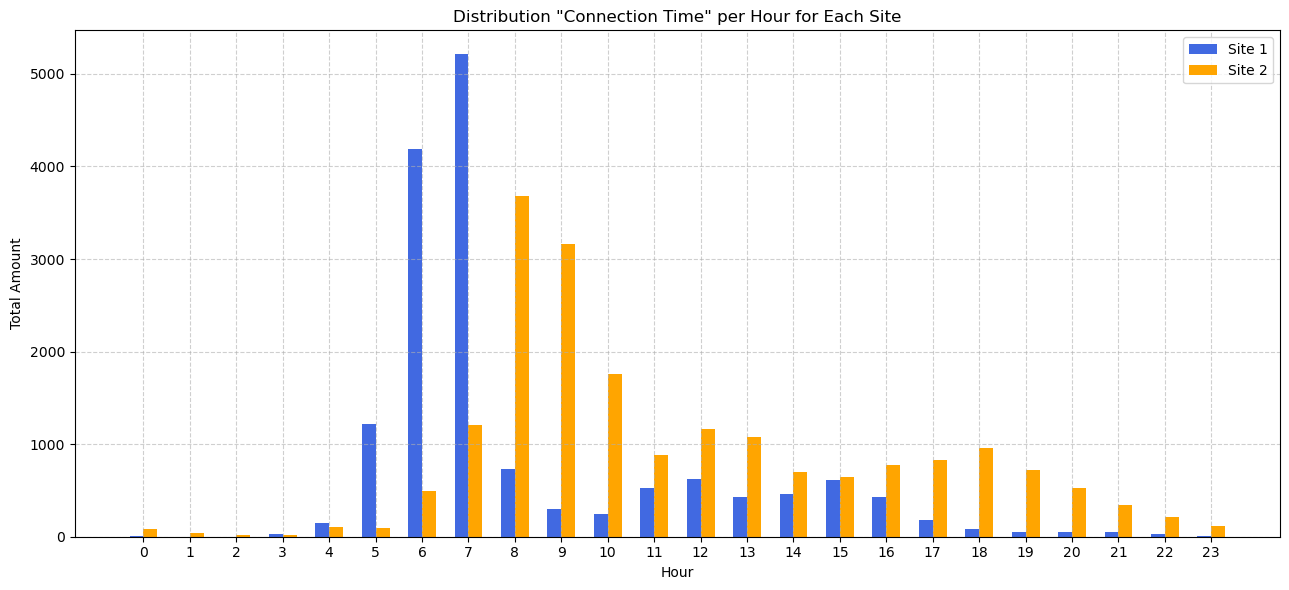

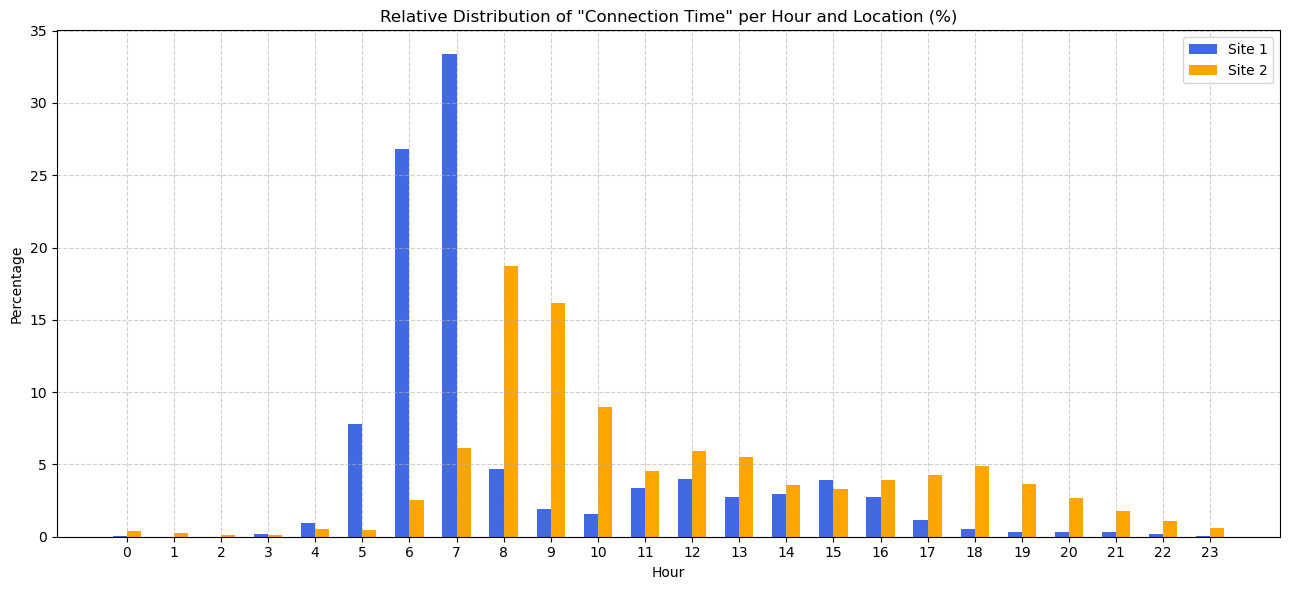

In [5]:
# Demonstrate how the number of charging events varies during the day

# Retrieve the hour
charging_sessions_data['hour'] = charging_sessions_data['connectionTime'].dt.hour

# Count the frequency per hour
hourly_counts = charging_sessions_data['hour'].value_counts().sort_index()

# Calculation of the absolute distribution per hour and location
absolute_counts = charging_sessions_data.groupby('siteID')['hour'].value_counts().unstack(fill_value=0).sort_index()

# Calculation of the relative distribution (percentage)
relative_counts = absolute_counts.div(absolute_counts.sum(axis=1), axis=0) * 100

# Plotting the distribution
# Plotting ConnectionTime per hour for both sites
plt.figure(figsize=(10, 6))
hourly_counts.plot(kind='bar', color='royalblue')
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.title('Distribution "Connection Time" per Hour for Both Sites')
plt.xlabel('Hour')
plt.ylabel('Total Amount')
plt.xticks(range(24))

plt.tight_layout()
plt.show()


# Plotting Distribution "Connection Time" per hour for each site
bar_width = 0.3  # Adjust bar width as needed
x_indices = absolute_counts.columns  # Extract the hours (assuming columns represent hours)
colors = ['royalblue', 'orange']

plt.figure(figsize=(13, 6))

# Plot bars for each site
for i, (site, color) in enumerate(zip(absolute_counts.index, colors)):
    plt.bar(
        x_indices + i * bar_width,  # Offset for each site's bars
        absolute_counts.loc[site],  # Data for the site
        width=bar_width,
        color=color,
        label=f'Site {site}',
    )

plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.title('Distribution "Connection Time" per Hour for Each Site')
plt.xlabel('Hour')
plt.ylabel('Total Amount')
plt.xticks(x_indices + bar_width * (len(absolute_counts.index) - 1) / 2, x_indices)  # Center x-ticks
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()


# Plotting Relative distribution of "Connection Time" per hour and location (%)
x_indices = relative_counts.columns  # Extract the hours (assuming columns represent hours)
plt.figure(figsize=(13, 6))

# Plot bars for each site
for i, (site, color) in enumerate(zip(relative_counts.index, colors)):
    plt.bar(
        x_indices + i * bar_width,  # Offset for each site's bars
        relative_counts.loc[site],  # Percentage data for the site
        width=bar_width,
        color=color,  # Use the color for the current site
        label=f'Site {site}'
    )

plt.grid(visible=True, linestyle='--', alpha=0.6)
plt.title('Relative Distribution of "Connection Time" per Hour and Location (%)')
plt.xlabel('Hour')
plt.ylabel('Percentage')
plt.xticks(x_indices + bar_width * (len(relative_counts.index) - 1) / 2, x_indices)  # Center x-ticks
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

#### 1.2. Number of Charging Events during the Week

<Figure size 1200x600 with 0 Axes>

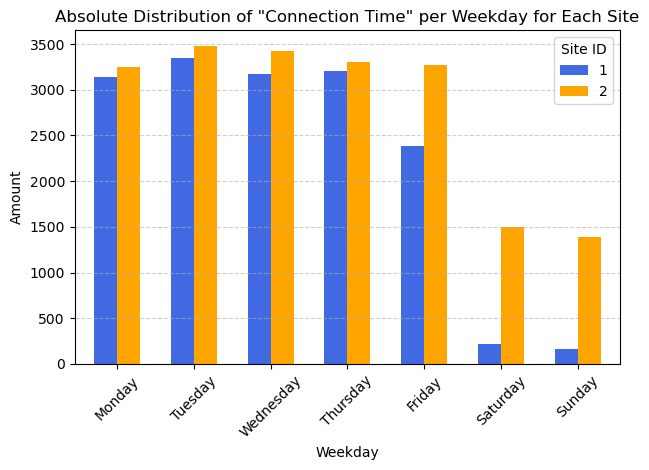

<Figure size 1200x600 with 0 Axes>

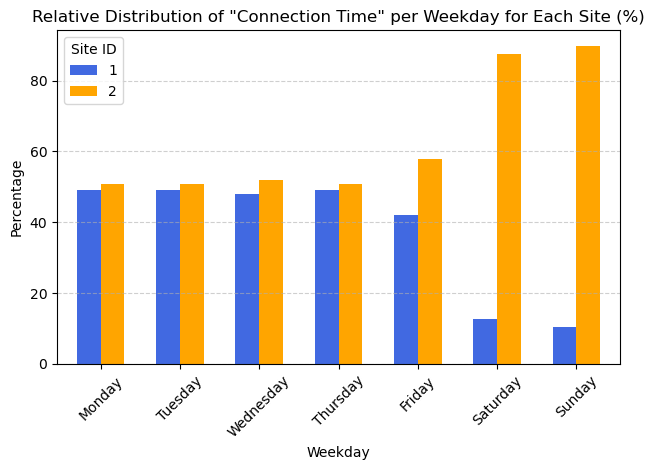

In [6]:
# Demonstrate how the number of charging events varies during the week

# Ensure the weekday names are labeled
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Retrieve the weekday
charging_sessions_data['weekday'] = charging_sessions_data['connectionTime'].dt.weekday

# Group data by weekday and site, and reindex to include all weekdays
absolute_counts_weekday_site = (
    charging_sessions_data.groupby(['weekday', 'siteID']).size().unstack(fill_value=0)
)
absolute_counts_weekday_site = absolute_counts_weekday_site.reindex(range(7), fill_value=0)  # Ensure all weekdays are present
absolute_counts_weekday_site.index = weekday_names  # Assign proper weekday names

# Calculation of the relative distribution (percentage) per location
relative_counts_weekday_site = absolute_counts_weekday_site.div(absolute_counts_weekday_site.sum(axis=1), axis=0) * 100

# Define colors for the sites
colors = ['royalblue', 'orange']

# Plotting the absolute distribution
plt.figure(figsize=(12, 6))
absolute_counts_weekday_site.plot(kind='bar', color=colors, width=0.6)
plt.title('Absolute Distribution of "Connection Time" per Weekday for Each Site')
plt.xlabel('Weekday')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Site ID')
plt.tight_layout()
plt.show()

# Plotting the relative distribution
plt.figure(figsize=(12, 6))
relative_counts_weekday_site.plot(kind='bar', color=colors, width=0.6)
plt.title('Relative Distribution of "Connection Time" per Weekday for Each Site (%)')
plt.xlabel('Weekday')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Site ID')
plt.tight_layout()
plt.show()

#### 1.3. Number of Charging Events during the Seasons

<Figure size 1200x600 with 0 Axes>

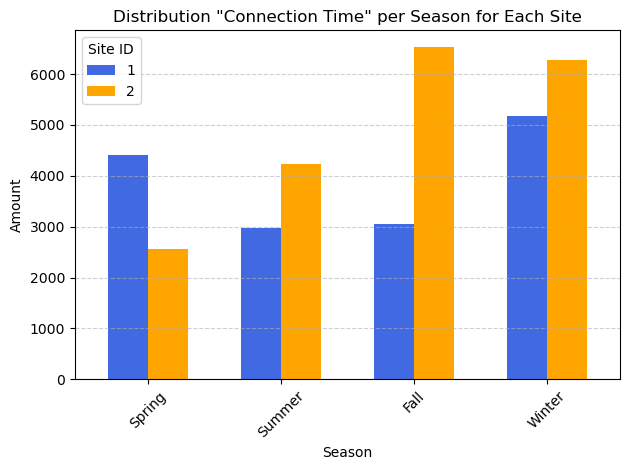

<Figure size 1200x600 with 0 Axes>

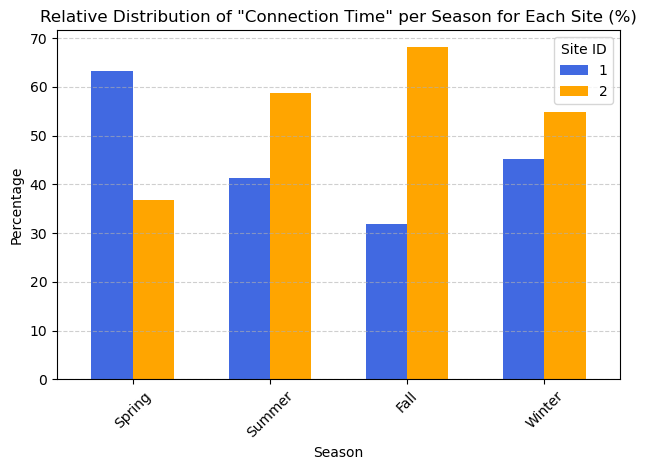

In [7]:
# Demonstrate how the number of charging events varies between the seasons

# The seasons in Los Angeles correspond to the quarters approximately, which is why these were used as a divider. 
# Ensure the quarter names are labeled
quarter_names = ['Spring', 'Summer', 'Fall', 'Winter']

# Retrieve the quarter
charging_sessions_data['quarter'] = charging_sessions_data['connectionTime'].dt.quarter

# Calculation of the absolute distribution per quarter and location
# Group data by quarter and site, and reindex to include all quarter
absolute_counts_quarter_site = (
    charging_sessions_data.groupby(['quarter', 'siteID']).size().unstack(fill_value=0)
)
absolute_counts_quarter_site = absolute_counts_quarter_site.reindex(range(1, 5), fill_value=0)  # Ensure all weekdays are present
absolute_counts_quarter_site.index = quarter_names  # Assign proper quarter names


# Calculation of the relative distribution (percentage) per location
relative_counts_quarter_site = absolute_counts_quarter_site.div(absolute_counts_quarter_site.sum(axis=1), axis=0) * 100

# Define colors for the sites
colors = ['royalblue', 'orange']

# Plotting the absolute distribution
plt.figure(figsize=(12, 6))
absolute_counts_quarter_site.plot(kind='bar', color=colors, width=0.6)
plt.title('Distribution "Connection Time" per Season for Each Site')
plt.xlabel('Season')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Site ID')
plt.tight_layout()
plt.show()

# Plotting the relative distribution
plt.figure(figsize=(12, 6))
relative_counts_quarter_site.plot(kind='bar', color=colors, width=0.6)
plt.title('Relative Distribution of "Connection Time" per Season for Each Site (%)')
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Site ID')
plt.tight_layout()
plt.show()

### 2. Key Performance Indicators (KPIs)

#### 2.1. Peak and Off-Utilization Time (per Site)

In [42]:
# Calculate hourly values of the KPI - Peak and Off-Utilization Time (per Site)
from datetime import datetime, timedelta 

# Create a DataFrame from the provided charging sessions data 
df = pd.DataFrame(charging_sessions_data)


# Convert 'connectionTime' and 'disconnectTime' columns from string to datetime objects.
# Note: This step is already done in Data_Preparation, so we can drop this if it is exported
# df['connectionTime'] = pd.to_datetime(df['connectionTime'])
# df['disconnectTime'] = pd.to_datetime(df['disconnectTime'])

# Get unique site IDs
site_ids = df['siteID'].unique()

# Dictionary to store the results for each siteID
utilization_per_site = {}

# Iterate over each siteID
for site in site_ids:
    # Filter DataFrame for the current siteID -> site is either 1 or 2
    site_number = df[df['siteID'] == site]

    # Initialize an array to store the occupied minutes and the count of occupied minutes for each hour of the day.
    # The array will have 24 elements (one for each hour of the day, from 0 to 23).
    # Each element is a list where:
    # - index 0 will store the total number of occupied minutes in that hour.
    # - index 1 will store the count of occupied minutes (i.e., how many times a minute was occupied)
    minutes_array = [[0.0, 0.0] for _ in range(24)]  # Initialize each hour with [0.0, 0.0] (minutes, count)

    # Iterate through the DataFrame for site == 1 or for site == 2
    for row in site_number.itertuples():
        # Extract sessionID, connectionTime, and disconnectTime for each charging session
        sessionid = row.sessionID
        currenttime = row.connectionTime
        endtime = row.disconnectTime
        
        # Extract the hour and minute from the connectionTime and disconnectTime
        currenttimeStunde = currenttime.hour
        currenttimeMinute = currenttime.minute
        endtimeStunde = endtime.hour
        endtimeMinute = endtime.minute
        
        if currenttime >= endtime:
            print(f"Warning: Invalid time data for SessionID {row.sessionID}.")
            continue

        while currenttime < endtime:  # Keep going until we reach the disconnect time
            minutes_array[currenttime.hour][0] += currenttimeMinute  # Add the minute to the corresponding hour in the minutes_array
            minutes_array[currenttime.hour][1] += 1  # Increment the count for occupied minutes in this hour
            currenttime += timedelta(minutes=1)
           

    #print(minutes_array) #-> for testing

    # Calculation of the utilisation in percent, based on the occupied minutes per entry
    utilization_per_hour_array = []

    for hour in range(24):
        occupied_minutes = minutes_array[hour][0]  # occupied minutes 
        entry_count = minutes_array[hour][1]  # Number of occupied minute entries

        # Calculate the average occupied minutes per entry
        if entry_count > 0:
            avg_occupied_minutes_per_entry = occupied_minutes / entry_count
        else:
            avg_occupied_minutes_per_entry = 0

        # Calculate the percentage utilisation based on the average occupied minutes
        utilization = (avg_occupied_minutes_per_entry / 60) * 100

        # Add the utilisation for this hour
        utilization_per_hour_array.append(utilization)
        
    # Store the results in the dictionary
    utilization_per_site[site] = utilization_per_hour_array

# print for each site
for site, utilization_per_hour_array in utilization_per_site.items():
    print(f"\nSite {site}:")
    for hour, utilization in enumerate(utilization_per_hour_array):
        print(f"hour {hour}: {utilization:.2f}% Utilization")


Site 1:
hour 0: 46.01% Utilization
hour 1: 49.72% Utilization
hour 2: 51.85% Utilization
hour 3: 57.34% Utilization
hour 4: 61.38% Utilization
hour 5: 56.21% Utilization
hour 6: 50.76% Utilization
hour 7: 48.47% Utilization
hour 8: 49.08% Utilization
hour 9: 48.96% Utilization
hour 10: 48.95% Utilization
hour 11: 48.91% Utilization
hour 12: 48.75% Utilization
hour 13: 48.78% Utilization
hour 14: 48.75% Utilization
hour 15: 49.02% Utilization
hour 16: 48.66% Utilization
hour 17: 48.76% Utilization
hour 18: 48.74% Utilization
hour 19: 47.20% Utilization
hour 20: 46.79% Utilization
hour 21: 45.19% Utilization
hour 22: 45.88% Utilization
hour 23: 46.90% Utilization

Site 2:
hour 0: 49.21% Utilization
hour 1: 49.27% Utilization
hour 2: 49.41% Utilization
hour 3: 49.39% Utilization
hour 4: 49.58% Utilization
hour 5: 51.00% Utilization
hour 6: 50.74% Utilization
hour 7: 50.82% Utilization
hour 8: 49.29% Utilization
hour 9: 49.72% Utilization
hour 10: 49.37% Utilization
hour 11: 49.41% Utiliz

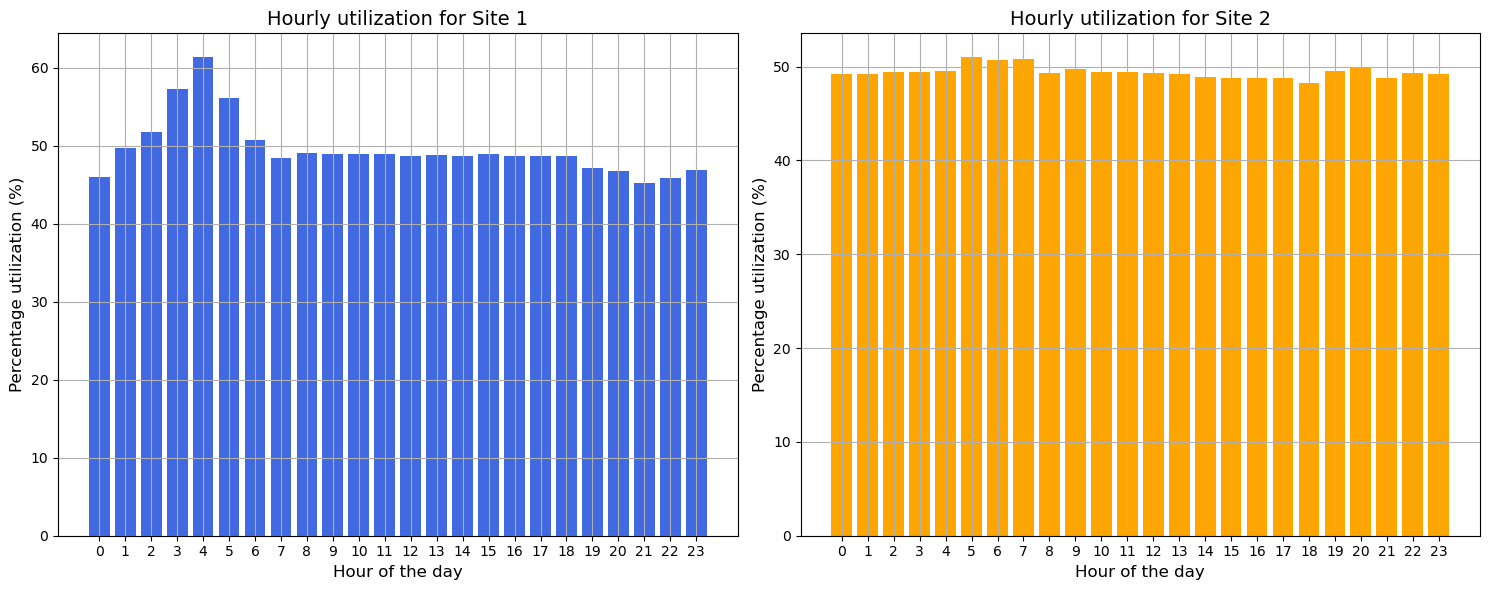

In [43]:
# Visualize hourly values of the KPIs over time

# bar chart

# Cast site_ids to a standard Python int type
site_ids = [int(site) for site in site_ids]

fig, axes = plt.subplots(1, len(site_ids), figsize=(15, 6)) 
# iterate over the siteIds
for i, site in enumerate(site_ids):
    # array for the current site
    utilization_per_hour_array = utilization_per_site[int(site)]
    
    # Plot the bar chart using the hours as the x-axis and 'utilization_per_hour_array' as the y-axis values, set color - royalblue for site 1, orange for site 2
    color = 'orange' if site == 2 else 'royalblue'
    axes[i].bar(range(24), utilization_per_hour_array, color=color)

     # Axis labelling and titles
    axes[i].set_xlabel('Hour of the day', fontsize=12)
    axes[i].set_ylabel('Percentage utilization (%)', fontsize=12)
    axes[i].set_title(f'Hourly utilization for Site {site}', fontsize=14)

    axes[i].set_xticks(range(24)) # Ensure that all hours (0 to 23) are shown on the X-axis
    axes[i].grid(True)  # Add a grid

plt.tight_layout() # Adjust the layout of the plot to prevent overlapping of labels or elements

plt.show() # Display the plot'

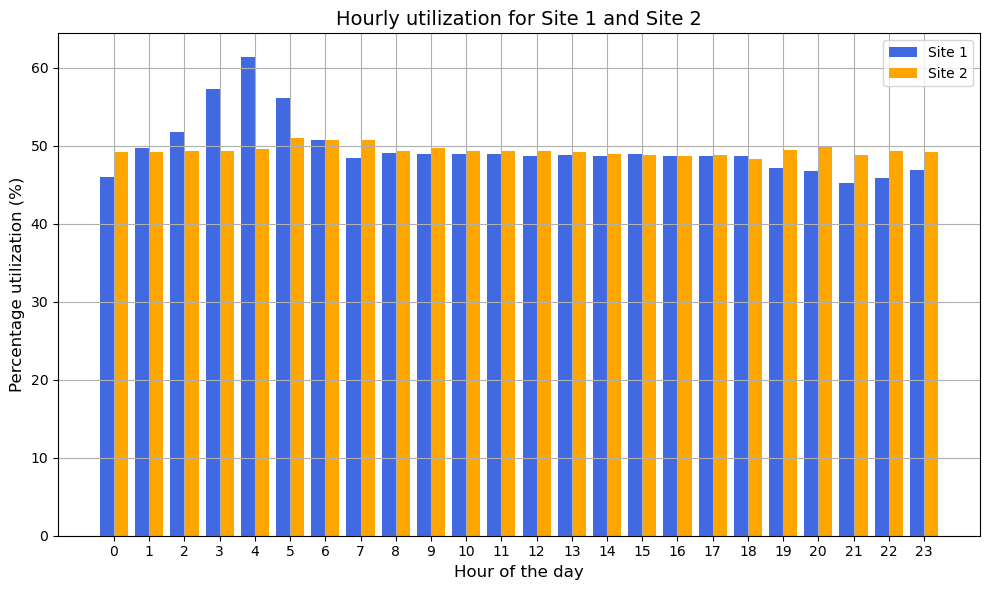

In [44]:
# visualize utilization time per hour for both sites in barchart

fig, ax = plt.subplots(figsize=(10, 6))  # Eine einzelne Achse

# The width of the beams (so that they fit next to each other)
bar_width = 0.4


x = range(24)  # X values from 0 to 23 for each hour

#draw the hourly utilisation for site 1 in royalblue
ax.bar([i - bar_width / 2 for i in x], utilization_per_site[1], color='royalblue', width=bar_width, label='Site 1')

# Draw the hourly utilisation for Site 2 in orange, shift the X values by bar_width
ax.bar([i + bar_width / 2 for i in x], utilization_per_site[2], color='orange', width=bar_width, label='Site 2')

# Axis labelling and titles
ax.set_xlabel('Hour of the day', fontsize=12)
ax.set_ylabel('Percentage utilization (%)', fontsize=12)
ax.set_title('Hourly utilization for Site 1 and Site 2', fontsize=14)


ax.set_xticks(range(24))  # Ensure that all hours (0 to 23) are shown on the X-axis
ax.grid(True)  # add a grid 

ax.legend() # add a legend

plt.tight_layout() # Adjust the layout of the plot to prevent overlapping of labels or elements

plt.show() # Display the plot

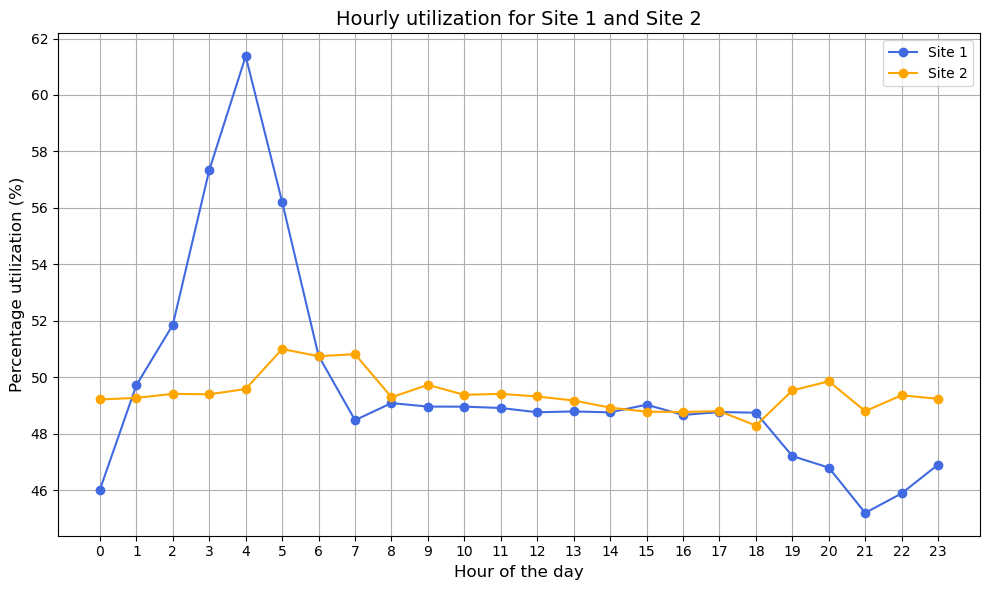

In [45]:
# Visualize utilization time per hour for both sites in line chart

fig, ax = plt.subplots(figsize=(10, 6))  # One axis for the plot

# Draw the hourly utilization for Site 1 in royalblue (line chart)
ax.plot(range(24), utilization_per_site[1], color='royalblue', marker='o', label='Site 1')

# Draw the hourly utilization for Site 2 in orange (line chart), with markers
ax.plot(range(24), utilization_per_site[2], color='orange', marker='o', label='Site 2')

# Axis labelling and titles
ax.set_xlabel('Hour of the day', fontsize=12)
ax.set_ylabel('Percentage utilization (%)', fontsize=12)
ax.set_title('Hourly utilization for Site 1 and Site 2', fontsize=14)

# Set x-ticks for all hours (0 to 23)
ax.set_xticks(range(24))  

# Add grid for better readability
ax.grid(True)  

# Add a legend to label the sites
ax.legend()

# Adjust layout to avoid overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

#### 2.2. Average Idle Time per Hour per SiteID

In [46]:
# split data into 2 sites
site1_sessions = charging_sessions_data[charging_sessions_data["siteID"] == 1]
site2_sessions = charging_sessions_data[charging_sessions_data["siteID"] == 2]

# calculate idle time in hours for each site
disconnect_time1 = site1_sessions["disconnectTime"]
done_charging_time1 = site1_sessions["doneChargingTime"]
disconnect_time2 = site2_sessions["disconnectTime"]
done_charging_time2 = site2_sessions["doneChargingTime"]

# convert idle time from days into hours
idle_time1 = (disconnect_time1 - done_charging_time1).dt.total_seconds() / 60
idle_time1 = idle_time1 / 60
hours1 = disconnect_time1.dt.hour
idle_time2 = (disconnect_time2 - done_charging_time2).dt.total_seconds() / 60
idle_time2 = idle_time2 / 60
hours2 = disconnect_time2.dt.hour

# aggregate: Calculate average idle time per hour
unique_hours = np.arange(24)  # 24 hours in a day
average_idle_time1 = np.array([
    idle_time1[hours1 == hour].mean() for hour in unique_hours
])
average_idle_time2 = np.array([
    idle_time2[hours2 == hour].mean() for hour in unique_hours
])

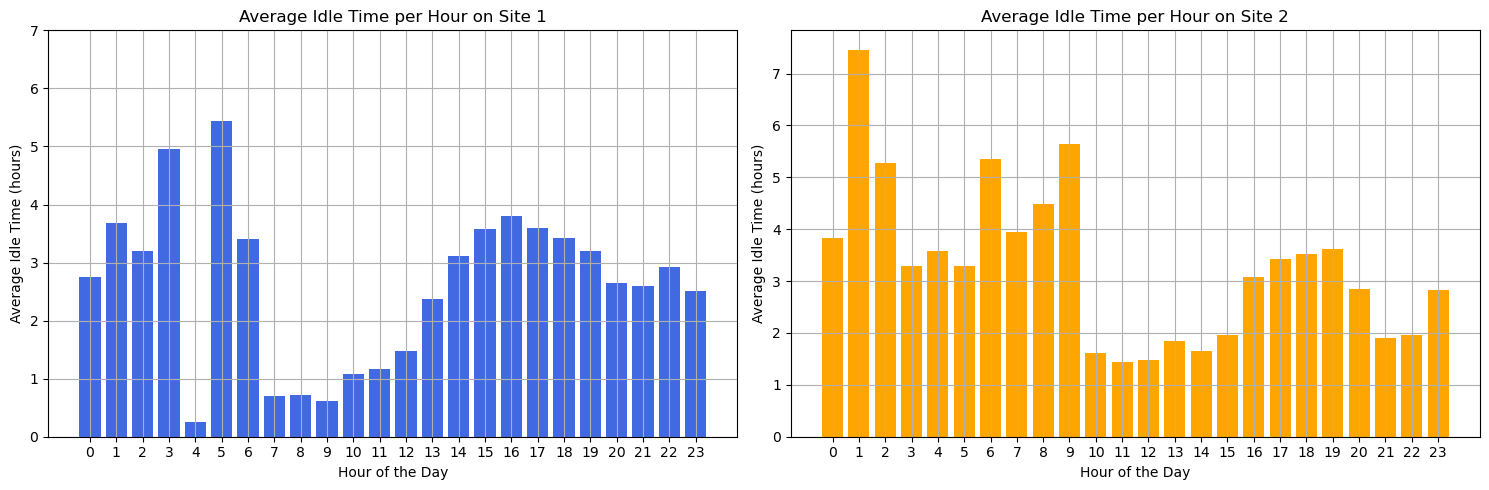

In [25]:
# visualize average idle time of each site side by side in bar chart
# create subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# visualize idle time per hour for the first site
axs[0].bar(unique_hours, average_idle_time1, color='royalblue')
axs[0].grid(True)

axs[0].set_title("Average Idle Time per Hour on Site 1")
axs[0].set_xlabel("Hour of the Day")
axs[0].set_ylabel("Average Idle Time (hours)")
axs[0].set_xticks(range(24))
axs[0].set_yticks(range(8))

# visualize idle time per hour for the second site
axs[1].bar(unique_hours, average_idle_time2, color='orange')
axs[1].grid(True)

axs[1].set_title("Average Idle Time per Hour on Site 2")
axs[1].set_xlabel("Hour of the Day")
axs[1].set_ylabel("Average Idle Time (hours)")
axs[1].set_xticks(range(24))
axs[1].set_yticks(range(8))

# adjust layout
plt.tight_layout()
plt.show()

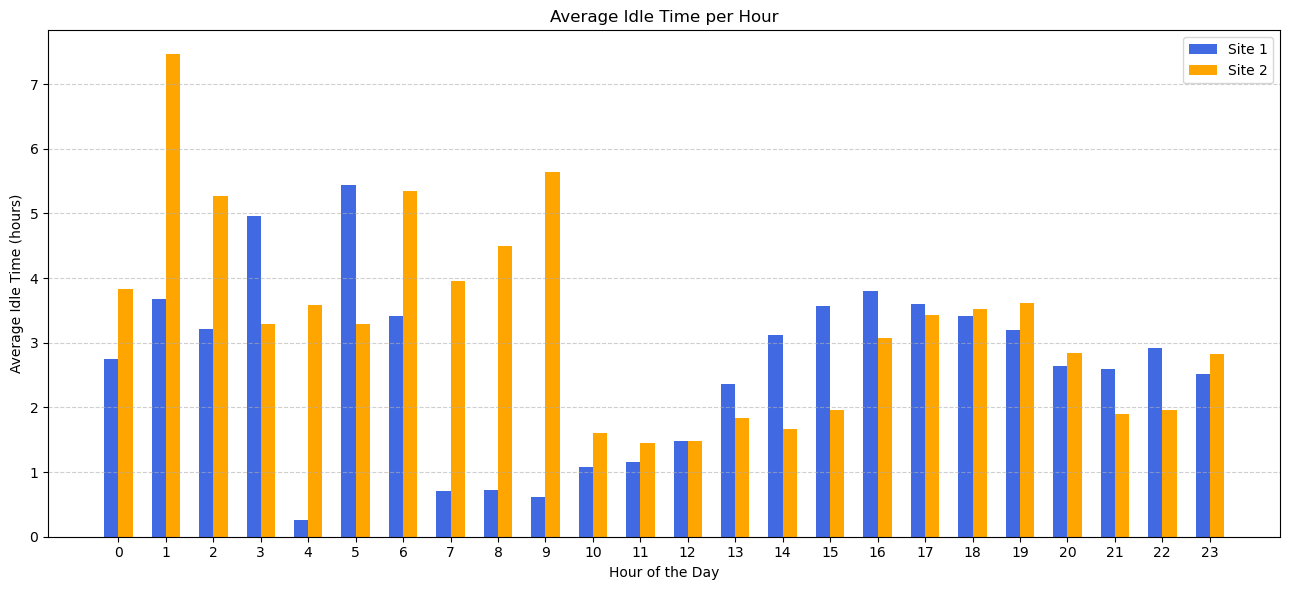

In [26]:
# visualize idle time per hour for both sites in barchart
bar_width = 0.3

plt.figure(figsize=(13, 6))
plt.bar(unique_hours - bar_width / 2, average_idle_time1, width=bar_width, color = "royalblue", label='Site 1')
plt.bar(unique_hours + bar_width / 2, average_idle_time2, width=bar_width, color = "orange", label='Site 2')
plt.grid(axis='y', visible=True, linestyle='--', alpha=0.6)

plt.title("Average Idle Time per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Idle Time (hours)")
plt.xticks(range(24))
plt.legend()

# adjust layout
plt.tight_layout()
plt.show()

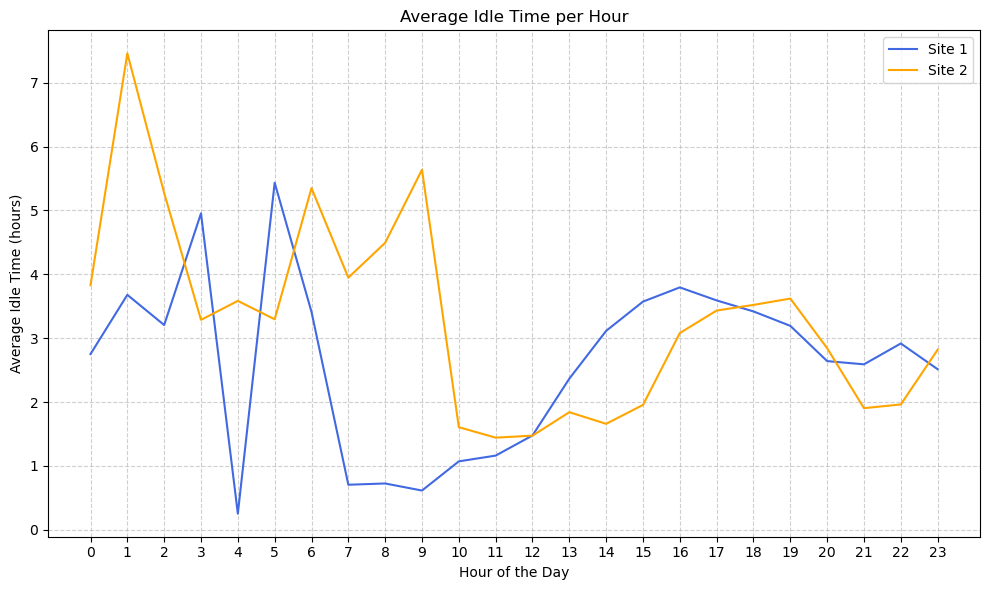

In [27]:
# visualize idle time per hour for both sites in linechart
plt.figure(figsize=(10, 6))
plt.plot(unique_hours, average_idle_time1, color = "royalblue", label='Site 1')
plt.plot(unique_hours, average_idle_time2, color = "orange", label='Site 2')
plt.grid(visible=True, linestyle='--', alpha=0.6)

plt.title("Average Idle Time per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Idle Time (hours)")
plt.xticks(range(24))
plt.legend()

# adjust layout
plt.tight_layout()
plt.show()

#### 2.3. Average Energy Delivered per Session per Site per Hour

In [28]:
# split dataframe into 2 sites
site1_sessions = charging_sessions_data[charging_sessions_data["siteID"] == 1]
site2_sessions = charging_sessions_data[charging_sessions_data["siteID"] == 2]

# function that filters data by hour
def filterSessionsByHour(hour, df):
    hour = df[df['connectionTime'].dt.hour == hour]
    return hour

def avgEnergyToList(df):
    energyList = []
    for i in range(24):
        hour = filterSessionsByHour(i, df)
        totalEnergy = hour.kWhDelivered.sum()
        # calculute average energy by summing up energy delivered in the hour and dividing by number of sessions
        avgEnergy = totalEnergy / len(hour) 
        energyList.append(avgEnergy)
    return energyList

energyList_site1 = avgEnergyToList(site1_sessions)
energyList_site2 = avgEnergyToList(site2_sessions)


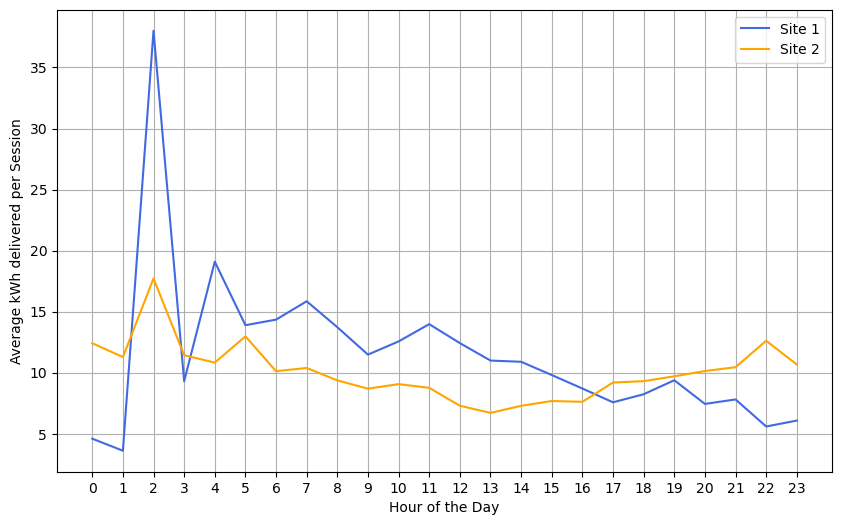

In [29]:
# visualize average energy
import matplotlib.pyplot as plt
import numpy as np

hours = range(24)
y_1 = np.array(energyList_site1)
y_2 = np.array(energyList_site2)

plt.figure(figsize=(10,6))
plt.plot(hours, y_1, color = "royalBlue", label='Site 1')
plt.plot(hours, y_2, color = "orange", label='Site 2')
plt.xticks(range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Average kWh delivered per Session")
plt.legend()
plt.grid(True)
plt.show()

[71.43, 100.0, 100.0, 100.0, 88.36, 91.71, 86.62, 84.68, 75.14, 82.94, 80.24, 84.29, 85.14, 80.32, 85.4, 83.47, 84.88, 82.7, 87.06, 92.45, 88.0, 92.86, 100.0, 100.0]
[32.1, 20.0, 30.43, 17.65, 7.77, 39.13, 45.33, 44.07, 50.27, 56.11, 59.33, 53.44, 52.55, 48.88, 45.47, 39.2, 38.18, 36.97, 35.74, 30.82, 34.27, 35.09, 26.51, 25.44]


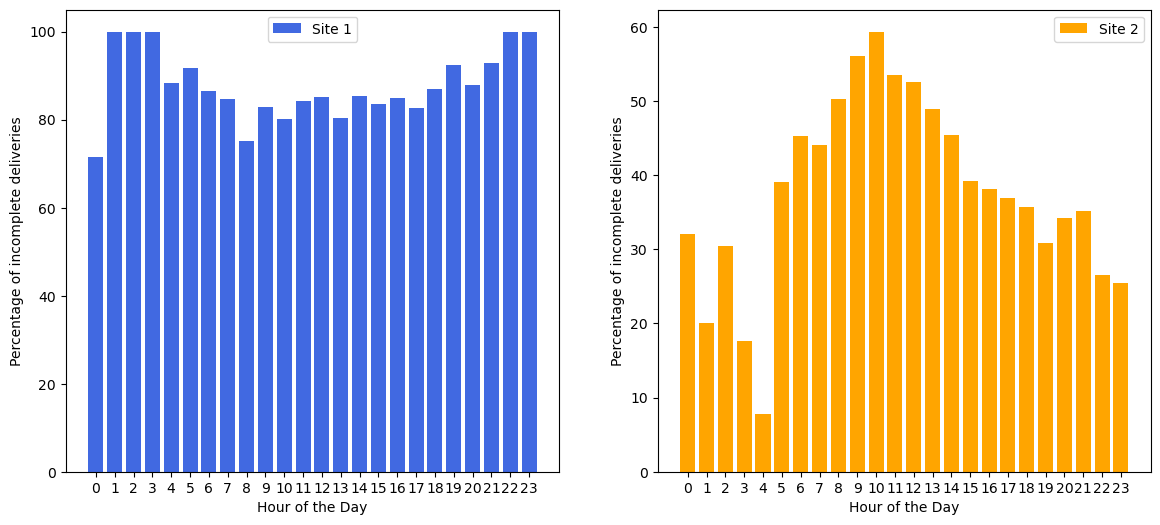

In [30]:
# An incomplete delivery is defined by a session that delivered less energy than requested, 
# although driver disconnected after charging was done
def underDeliveredToList(df):
    percentageList = []
    for i in range(24):
        hour = filterSessionsByHour(i, df)
        imcompleteSess = hour[(hour['kWhDelivered'] < hour['kWhRequested']) & (hour['disconnectTime'] >= hour['doneChargingTime']) ]
        percentage = round(len(imcompleteSess) / len(hour) * 100,2)
        percentageList.append(percentage)
    return percentageList


incompleteDelivery_site1 = underDeliveredToList(site1_sessions)
incompleteDelivery_site2 = underDeliveredToList(site2_sessions)

print(incompleteDelivery_site1)
print(incompleteDelivery_site2)

hours = range(24)
y_1 = np.array(incompleteDelivery_site1)
y_2 = np.array(incompleteDelivery_site2)

plt.figure(figsize=(14, 6)) 

plt.subplot(1, 2, 1)
plt.bar(hours, y_1, color = "royalBlue", label='Site 1')
plt.xticks(range(24), labels=range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Percentage of incomplete deliveries")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(hours, y_2, color = "orange", label='Site 2')
plt.xticks(range(24), labels=range(24))
plt.xlabel("Hour of the Day")
plt.ylabel("Percentage of incomplete deliveries")

plt.legend()
plt.show()

### 3. Site Characteristics

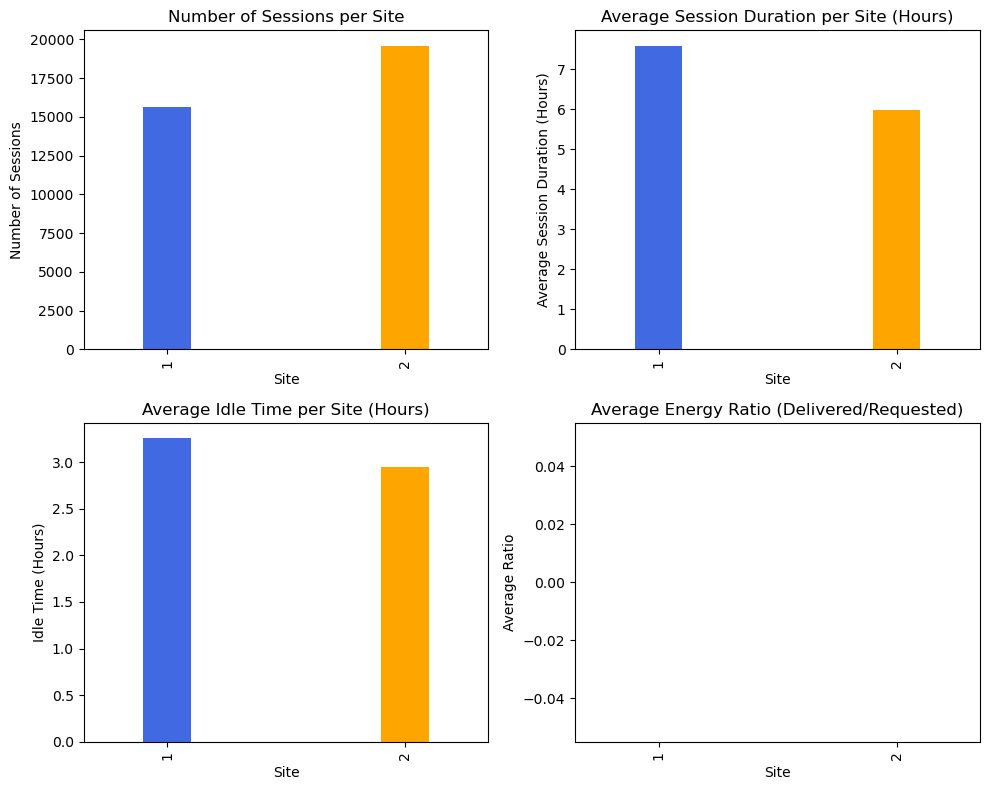

Number of sessions per site:
siteID
1    15622
2    19606
dtype: int64

A higher number of sessions indicates a public site due to higher frequency of usage.

Average session duration per site (hours):
siteID
1    7.588054
2    5.973487
Name: session_duration, dtype: float64

Longer session durations suggest a private site where users charge for extended periods.

Average idle time per site (hours):
siteID
1    3.257818
2    2.943556
Name: idle_time, dtype: float64

Higher idle times are typical at private sites where users leave vehicles connected longer after charging is complete.

Average energy ratio per site (delivered/requested):
siteID
1    inf
2    inf
Name: energy_ratio, dtype: float64

Higher energy ratios indicate that users are completing their charging sessions, typical at private sites.

Number of unique users per site:
siteID
1    404
2    373
Name: userID, dtype: int64

A larger number of unique users suggests a public site, while fewer unique users suggest a private si

In [31]:
# Add a column for session duration in hours
# The session duration is calculated as the difference between connection and disconnection times
charging_sessions_data["session_duration"] = (
    (charging_sessions_data["disconnectTime"] - charging_sessions_data["connectionTime"]).dt.total_seconds() / 3600
)

# Calculate idle time
# Idle time is the duration between when the charging completes and when the vehicle is disconnected
charging_sessions_data["idle_time"] = (
    (charging_sessions_data["disconnectTime"] - charging_sessions_data["doneChargingTime"]).dt.total_seconds() / 3600
)

# Add a column for energy delivered per requested energy
# This indicates how much of the requested energy was delivered
charging_sessions_data["energy_ratio"] = (
    charging_sessions_data["kWhDelivered"] / charging_sessions_data["kWhRequested"]
)

# Count the number of sessions per site
sessions_per_site = charging_sessions_data.groupby("siteID").size()

# Average session duration per site
# Represents the typical time a vehicle is connected to the charger
avg_duration_per_site = charging_sessions_data.groupby("siteID")["session_duration"].mean()

# Average idle time per site
# Highlights the average time vehicles remain at the charger after charging is complete
avg_idle_time_per_site = charging_sessions_data.groupby("siteID")["idle_time"].mean()

# Average energy ratio per site
# Reflects how much of the requested energy was delivered, indicating charging efficiency
avg_energy_ratio_per_site = charging_sessions_data.groupby("siteID")["energy_ratio"].mean()

# Number of unique users per site
# Helps differentiate between private (few recurring users) and public (many different users) hubs
unique_users_per_site = charging_sessions_data.groupby("siteID")["userID"].nunique()

# Visualization of differences between sites
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Reduce bar width
bar_width = 0.2 # Adjust to make bars thinner

# Number of sessions per site
sessions_per_site.plot(kind="bar", ax=axes[0, 0], color=["royalblue", "orange"], width=bar_width)
axes[0, 0].set_title("Number of Sessions per Site")
axes[0, 0].set_xlabel("Site")
axes[0, 0].set_ylabel("Number of Sessions")

# Average session duration per site
avg_duration_per_site.plot(kind="bar", ax=axes[0, 1], color=["royalblue", "orange"], width=bar_width)
axes[0, 1].set_title("Average Session Duration per Site (Hours)")
axes[0, 1].set_xlabel("Site")
axes[0, 1].set_ylabel("Average Session Duration (Hours)")

# Average idle time per site
avg_idle_time_per_site.plot(kind="bar", ax=axes[1, 0], color=["royalblue", "orange"], width=bar_width)
axes[1, 0].set_title("Average Idle Time per Site (Hours)")
axes[1, 0].set_xlabel("Site")
axes[1, 0].set_ylabel("Idle Time (Hours)")

# Average energy ratio per site
avg_energy_ratio_per_site.plot(kind="bar", ax=axes[1, 1], color=["royalblue", "orange"], width=bar_width)
axes[1, 1].set_title("Average Energy Ratio (Delivered/Requested)")
axes[1, 1].set_xlabel("Site")
axes[1, 1].set_ylabel("Average Ratio")

plt.tight_layout()
plt.show()

# Print results with explanations
print("Number of sessions per site:")
print(sessions_per_site)
print("\nA higher number of sessions indicates a public site due to higher frequency of usage.\n")

print("Average session duration per site (hours):")
print(avg_duration_per_site)
print("\nLonger session durations suggest a private site where users charge for extended periods.\n")

print("Average idle time per site (hours):")
print(avg_idle_time_per_site)
print("\nHigher idle times are typical at private sites where users leave vehicles connected longer after charging is complete.\n")

print("Average energy ratio per site (delivered/requested):")
print(avg_energy_ratio_per_site)
print("\nHigher energy ratios indicate that users are completing their charging sessions, typical at private sites.\n")

print("Number of unique users per site:")
print(unique_users_per_site)
print("\nA larger number of unique users suggests a public site, while fewer unique users suggest a private site.\n")

In [32]:
charging_sessions_data.head()

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,...,kWhRequested,milesRequested,minutesAvailable,requestedDeparture,hour,weekday,quarter,session_duration,idle_time,energy_ratio
0,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,...,8.00,20.0,65.0,2020-01-02 15:04:58,5,3,1,2.644722,1.331667,0.294375
1,5e23b149f9af8b5fe4b973d4,2020-01-02 06:00:13-08:00,2020-01-02 15:00:41-08:00,2020-01-02 12:13:21-08:00,13.370,1_1_194_821_2020-01-02 14:00:05.241573,1,AG-1F13,1-1-194-821,America/Los_Angeles,...,24.00,40.0,624.0,2020-01-03 00:24:13,6,3,1,9.007778,2.788889,0.557083
2,5e23b149f9af8b5fe4b973d5,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,43.477,1_1_178_817_2020-01-02 14:09:14.451827,1,AG-1F09,1-1-178-817,America/Los_Angeles,...,65.45,170.0,647.0,2020-01-03 00:56:14,6,3,1,11.812222,0.976944,0.664278
3,5e23b149f9af8b5fe4b973d6,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,32.441,1_1_191_804_2020-01-02 14:17:32.329535,1,AG-4F34,1-1-191-804,America/Los_Angeles,...,45.00,150.0,126.0,2020-01-02 16:23:32,6,3,1,10.456111,4.370556,0.720911
4,5e23b149f9af8b5fe4b973d7,2020-01-02 06:25:38-08:00,2020-01-02 11:36:05-08:00,2020-01-02 10:38:39-08:00,13.264,1_1_194_826_2020-01-02 14:25:37.578692,1,AG-1F11,1-1-194-826,America/Los_Angeles,...,40.00,100.0,491.0,2020-01-02 22:36:38,6,3,1,5.174167,0.957222,0.331600


In [33]:
charging_sessions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35228 entries, 0 to 35227
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype                              
---  ------              --------------  -----                              
 0   id                  35228 non-null  object                             
 1   connectionTime      35228 non-null  datetime64[ns, America/Los_Angeles]
 2   disconnectTime      35228 non-null  datetime64[ns, America/Los_Angeles]
 3   doneChargingTime    35228 non-null  datetime64[ns, America/Los_Angeles]
 4   kWhDelivered        35228 non-null  float64                            
 5   sessionID           35228 non-null  object                             
 6   siteID              35228 non-null  int64                              
 7   spaceID             35228 non-null  object                             
 8   stationID           35228 non-null  object                             
 9   timezone            35228 non-null  obj

In [34]:
# Export dataframe with new attributes
charging_sessions_data.to_csv('cleaned_data.csv', index=False)